# Eksploracyjna analiza danych - na przykładzie danych z siłowni

## Wprowadzenie
Na jaki zbiór danych patrzysz? Gdzie/jak został utworzony? Jakie pytania będą zadawane?
1. Jaki Workout_Type najczęsciej jest wybierany
2. Jaki Workout_Type spala najwięcej kalorii/h
3. Jaki Workout_Type wybierają ludzie 
4. Średnie tętno a liczba sesji treningowych w tygodniu 
5. Dzienne spożycie wody a rodzaj wykonywanego treningu

Hipoteza zerowa:
Hipoteza alternatywna:

Import bibliotek użytych w projekcie oraz danych do analizy:

In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

path = Path.cwd() / 'silownia_new.csv'
df = pd.read_csv(path)

In [24]:
print(df.head())

    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   NaN    Male         88.3        1.71      180      157           60   
1  46.0  Female         74.9        1.53      179      151           66   
2  32.0  Female         68.1        1.66      167      122           54   
3  25.0    Male         53.2        1.70      190      164           56   
4  38.0    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69             1313         Yoga            12.6   
1                      1.30              883          NaN            33.9   
2                      1.11              677       Cardio            33.4   
3                      0.59              532     Strength            28.8   
4                      0.64              556     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0        

In [25]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [26]:
print(df.describe(include=[np.number]))

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  873.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.626575    73.854676     1.72258  179.883864  143.766701   
std     12.273464    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     39.000000    70.000000     1.71000  180.000000  143.000000   
75%     50.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

## Czyszczenie i porządkowanie danych
Nasze dane posiadają 973 obserwacje i 15 kolumn.
Braki w danych są w kolumnach ['Age', 'Workout_Type', 'BMI']. 
Kolumnę BMI możemy obliczyć na podstawie wysokości i wagi. 
Problemem pozostał kolumny ['Age', 'Workout_Type']. Jest to 150 obserwacji 'Age' + 100 obserwacji 'Workout_Type'. 
Tylko w 14 obserwacjach pokrywa się brak 'Age' i 'Workout_type', co da nam 150+100-14=236 obserwacji z brakiem danych

##### Sprawdzanie kolumn z `nan`
Sprawdzamy konkretne *kolumny*, które mają wartości `nan`.  

In [27]:
print(df.shape)
print(df.duplicated().sum())

(973, 15)
0


In [28]:
nulls = df.isnull().sum()
print(nulls[nulls != 0].index.tolist())
print(nulls)
print(df[nulls[nulls != 0].index.tolist()].describe())


['Age', 'Workout_Type', 'BMI']
Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64
              Age         BMI
count  873.000000  823.000000
mean    38.626575   24.816549
std     12.273464    6.600485
min     18.000000   12.320000
25%     28.000000   20.105000
50%     39.000000   23.940000
75%     50.000000   28.450000
max     59.000000   47.720000


In [29]:
x=df[df['Age'].isna()]
y=x[x['Workout_Type'].isna()]
y.shape


(14, 15)

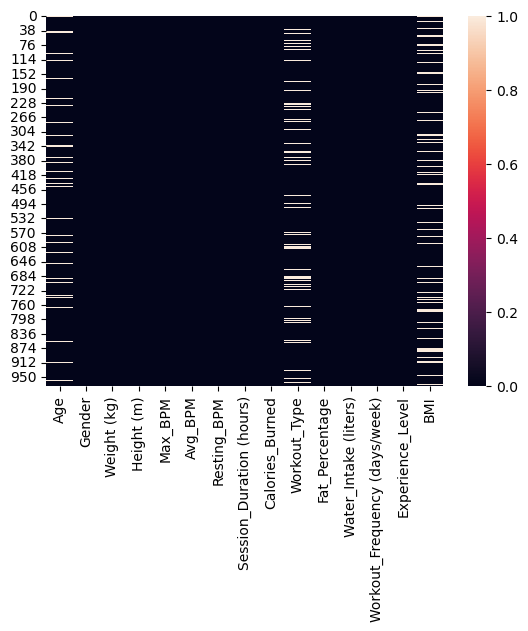

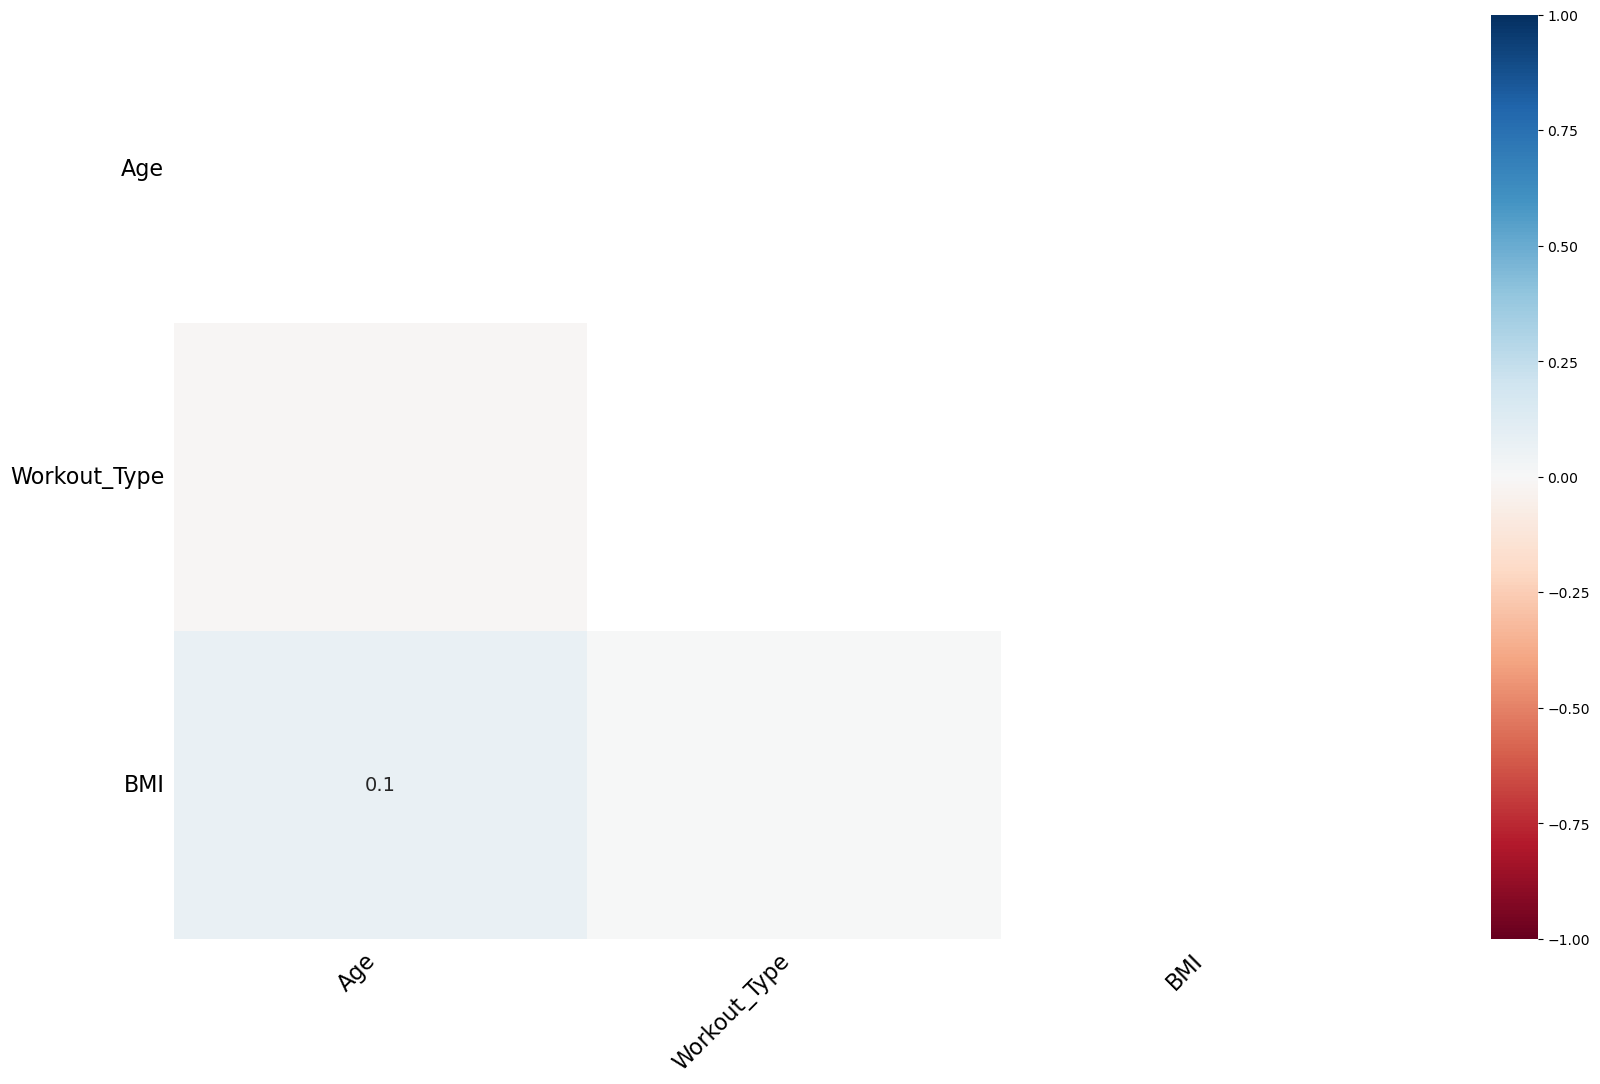

In [30]:
sns.heatmap(df.isna());

#alternatywnie
import missingno as msno
msno.heatmap(df);

In [31]:
print(df['Age'].unique())
print(df['Workout_Type'].unique())
print(df['BMI'].unique())

[nan 46. 32. 25. 38. 56. 36. 40. 28. 41. 53. 57. 20. 39. 19. 47. 55. 50.
 42. 44. 59. 45. 33. 54. 24. 26. 35. 21. 52. 31. 34. 23. 43. 51. 27. 48.
 58. 18. 22. 29. 30. 49. 37.]
['Yoga' nan 'Cardio' 'Strength' 'HIIT']
[  nan 32.   18.41 14.39 20.55 23.76 30.57 32.34 30.07 43.31 17.89 43.4
 23.62 13.88 27.34 13.98 21.81 26.96 28.41 22.95 25.16 22.51 21.78 20.12
 17.6  24.54 27.64 33.4  25.83 27.84 42.63 24.37 33.14 19.11 17.77 21.4
 17.3  33.8  23.93 40.1  15.31 23.17 20.42 33.61 34.18 22.78 44.84 28.35
 21.77 20.86 16.99 22.45 16.86 32.93 17.11 22.28 25.89 33.55 19.72 39.12
 27.7  15.24 21.88 16.76 18.15 33.16 24.72 17.27 19.65 23.53 28.87 21.53
 19.42 29.71 22.89 29.61 29.53 27.85 22.31 30.3  22.15 37.56 18.76 15.7
 22.61 34.5  18.12 17.54 18.66 23.09 31.41 29.87 21.64 25.68 23.52 23.74
 16.52 20.88 30.52 26.65 24.16 29.26 30.54 29.95 21.41 17.88 34.24 22.43
 22.64 24.5  24.55 26.86 22.08 24.75 30.18 31.61 19.63 23.05 27.93 23.59
 13.23 28.97 26.1  20.06 38.78 16.04 12.47 27.01 22.69 39

Funkcja mapy cieplnej pokazuje, że nie ma silnych korelacji między brakującymi wartościami różnych cech. To dobrze; niskie korelacje wskazują ponadto, że dane są MAR.

Uzupełnijmy teraz brakujące dane dla kolumny z BMI:

In [32]:
BMI_braki = df['BMI'].isnull()
df.loc[BMI_braki, 'BMI'] = df.loc[BMI_braki, 'Weight (kg)'] / (df.loc[BMI_braki, 'Height (m)'] ** 2)
print(df.isnull()["BMI"].sum())


0


Zobaczmy macierz korelacji dla wszystkich zmiennych liczbowych. Pomoże nam to zdecydować, co zrobić z pozostałymi brakami.  

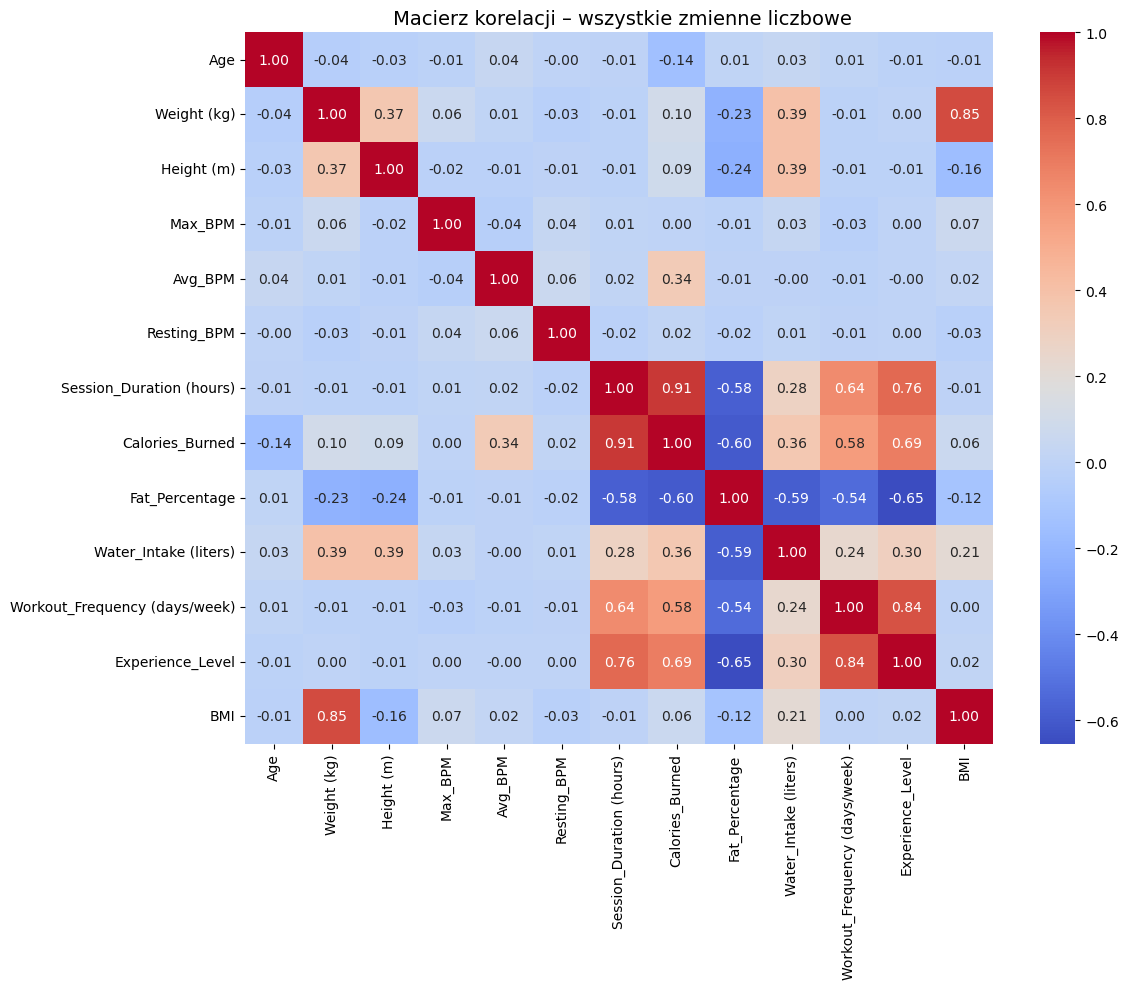

In [60]:
#korelacje z weikiem
kor_matrix= df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(kor_matrix, annot=True, cmap="coolwarm",fmt=".2f")
plt.title(" Macierz korelacji – wszystkie zmienne liczbowe", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Imputacja wielokrotna dla braków:

In [34]:
from imputer import impute_with_mice
df_imputed = impute_with_mice(df, iterations=5)
df_imputed

,Age,Gender,Weight_kg,Height_m,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_hours,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_liters,Workout_Frequency_days_per_week,Experience_Level,BMI
0,39.0,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.197326
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,Yoga,33.9,2.1,4,2,32.000000
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.713311
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.410000
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24.0,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.770000
969,25.0,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.693453
970,48.0,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.498967
971,32.0,Male,126.4,1.83,198,146,62,1.10,883,Strength,28.2,2.1,3,2,37.740000


Porównujemy rozkład danych dla danych przed i po imputacji:


In [48]:
import plotly.graph_objects as go

fig = go.Figure()

# Histogram Age PRZED imputacją
fig.add_trace(go.Histogram(
    x=df['Age'],
    name='Przed imputacją',
    marker_color='#e74c3c',
    opacity=0.6
))

# Histogram Age PO imputacji
fig.add_trace(go.Histogram(
    x=df_imputed['Age'],
    name='Po imputacji',
    marker_color='#2ecc71',
    opacity=0.6
))

# Ustawienia: nałożenie słupków
fig.update_layout(
    barmode='overlay',
    title='Porównanie rozkładu Age – przed i po imputacji',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Age',
    yaxis_title='Liczba obserwacji',
    template='plotly_white'
)

fig.show()


In [49]:
import plotly.graph_objects as go

fig = go.Figure()

# Histogram Workout_Type PRZED imputacją
fig.add_trace(go.Histogram(
    x=df['Workout_Type'],
    name='Przed imputacją',
    marker_color='#e74c3c',
    opacity=0.6
))

# Histogram Workout_Type PO imputacji
fig.add_trace(go.Histogram(
    x=df_imputed['Workout_Type'],
    name='Po imputacji',
    marker_color='#2ecc71',
    opacity=0.6
))

# Ustawienia: nałożenie słupków
fig.update_layout(
    barmode='overlay',
    title='Porównanie rozkładu Workout_Type – przed i po imputacji',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Workout_Type',
    yaxis_title='Liczba obserwacji',
    template='plotly_white'
)

fig.show()


### Analiza wartości odstających:
W kolumnach "Weight_kg", "Calories_burned" i "BMI" zaobserwowano występowanie outlierów. Ich obecność wydaje się być realna- nie stwierdzono błędów w danych. 


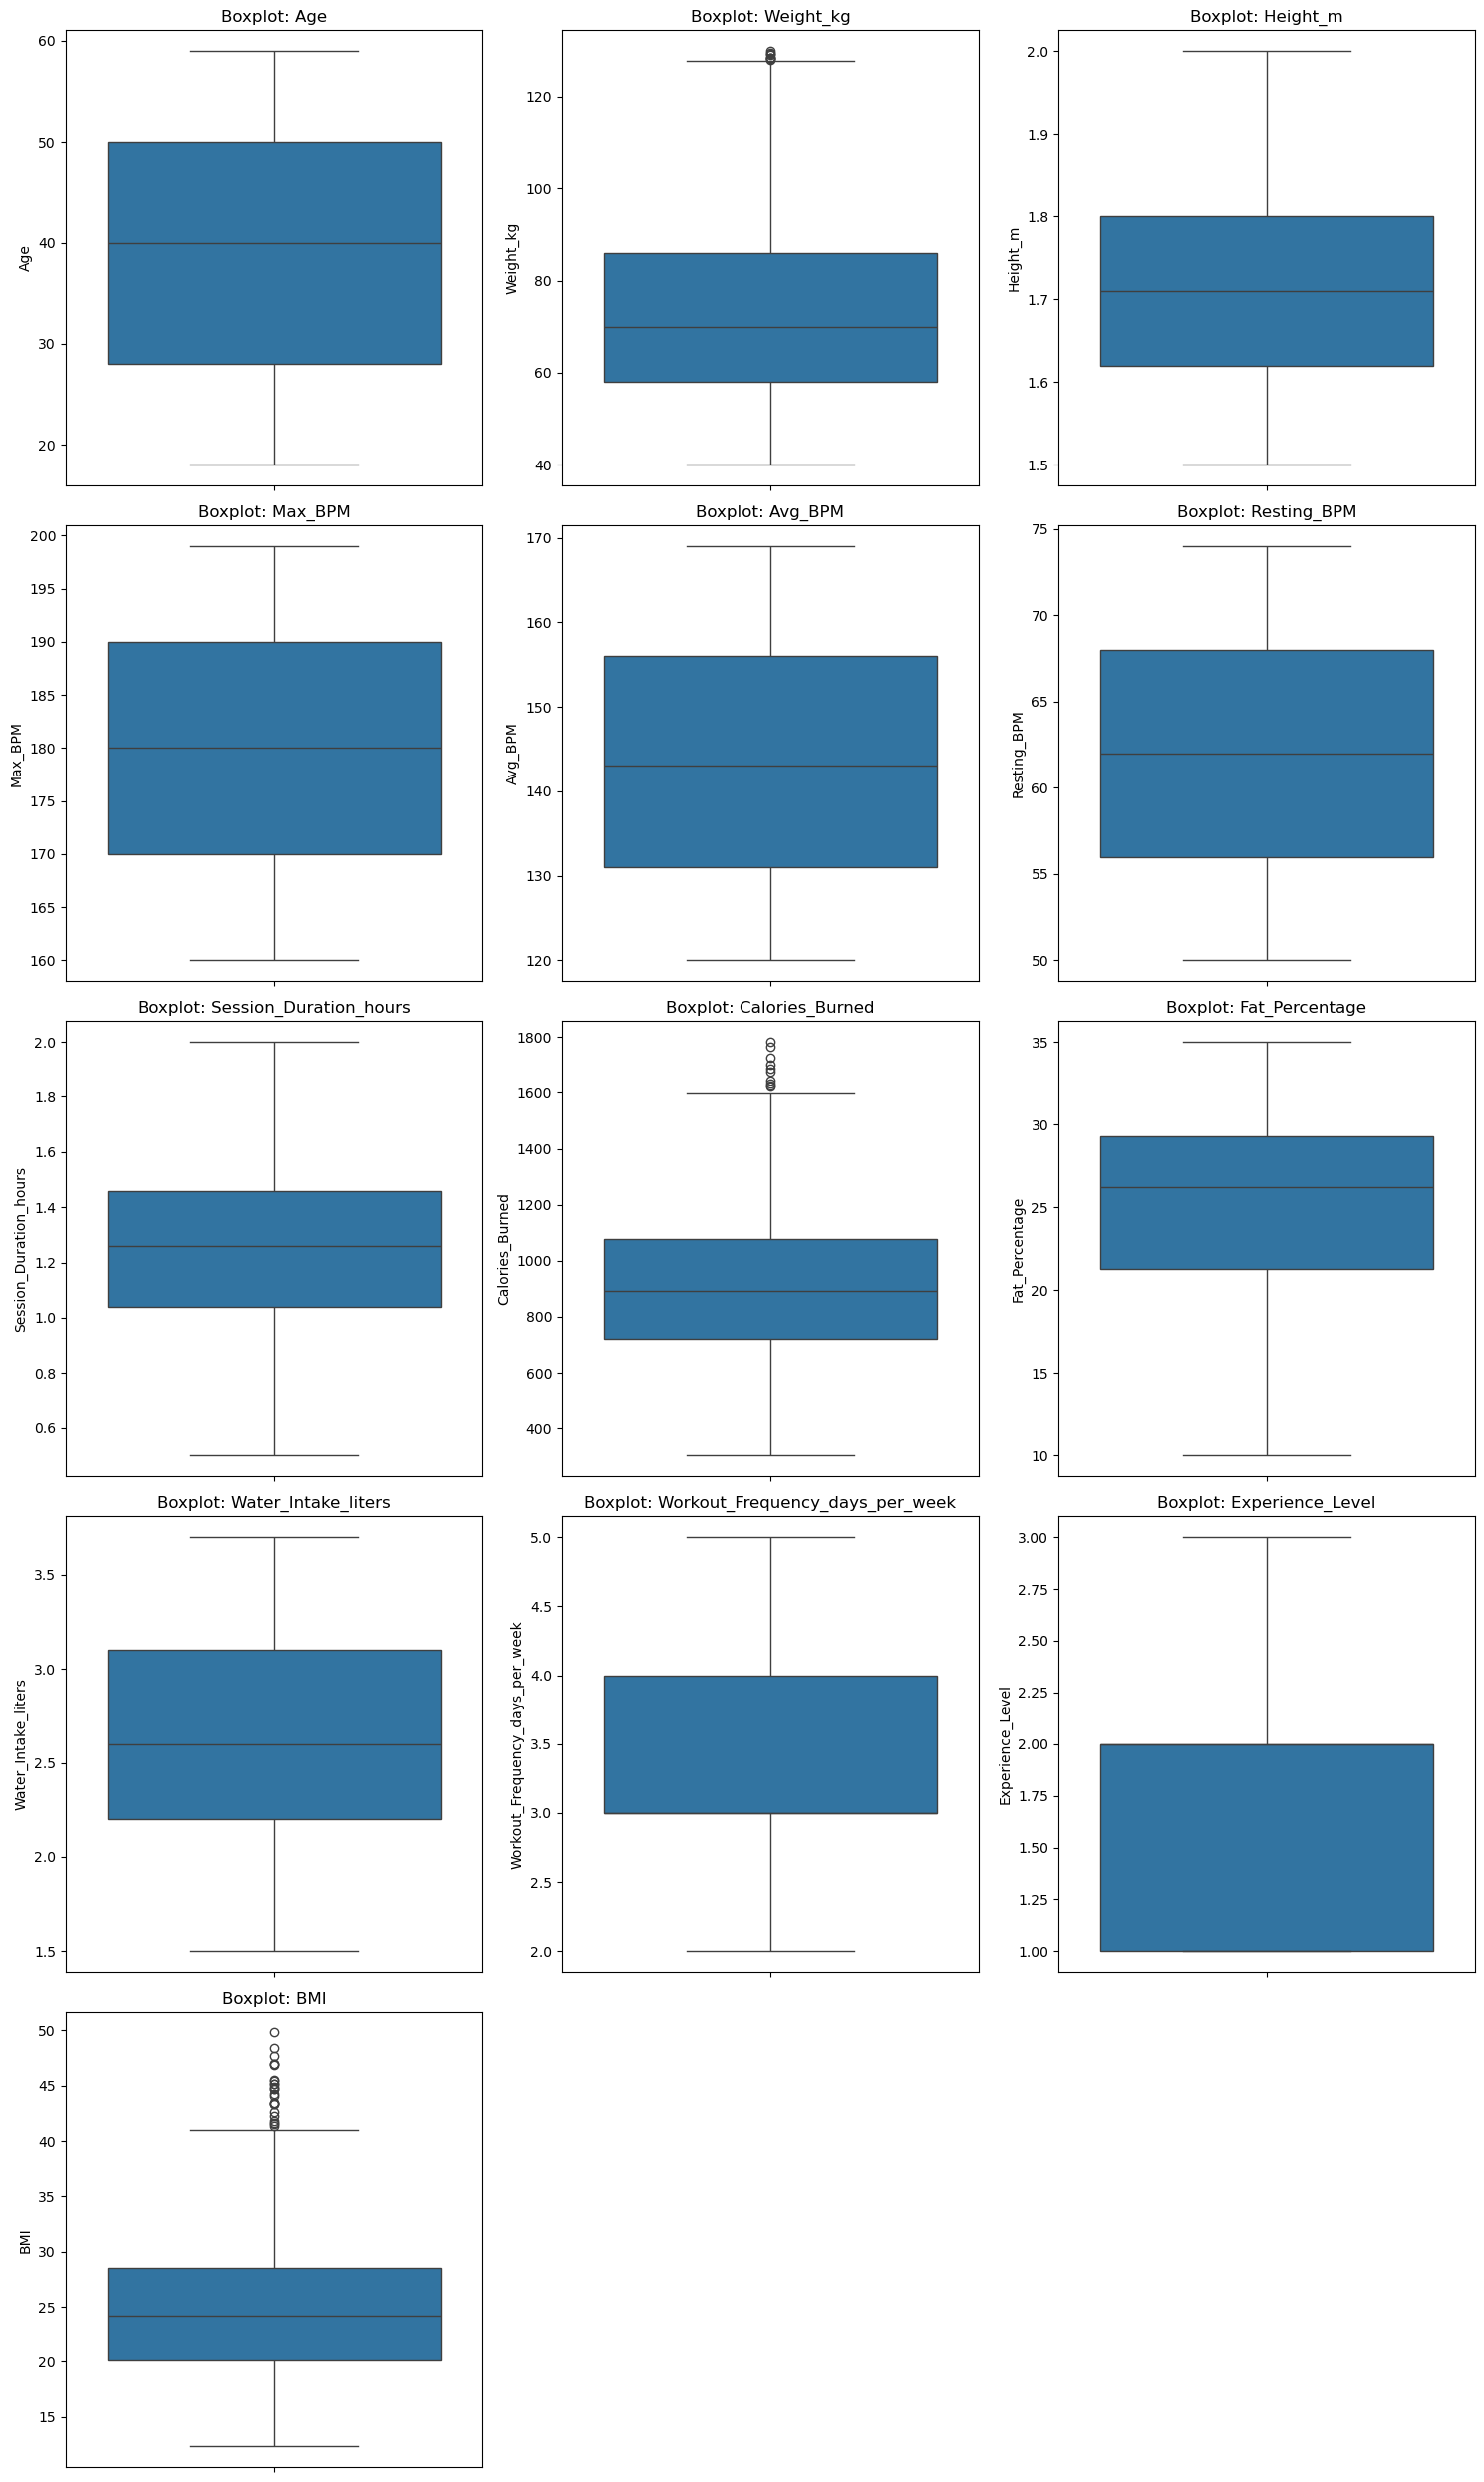

In [58]:
numeric_cols = df_imputed.select_dtypes(include=['number']).columns

# Rozmiar siatki wykresów
plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 2) // 3)))

# Tworzenie boxplotów
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(data=df_imputed[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

plt.show()

### Wizualizacje

4-5 wykresów przedstawiających określone wzorce lub cechy, które chcesz podkreślić. Każdej wizualizacji powinien towarzyszyć krótki (1-2 zdania) opis tego, co według Ciebie pokazuje.	
np. Boxplot pokazujący ceny nieruchomości według miast lub innych charakterystyk - przekroje. Wykres słupkowy pokazujący proporcję mieszkań o róznym standardzie wykończenia.

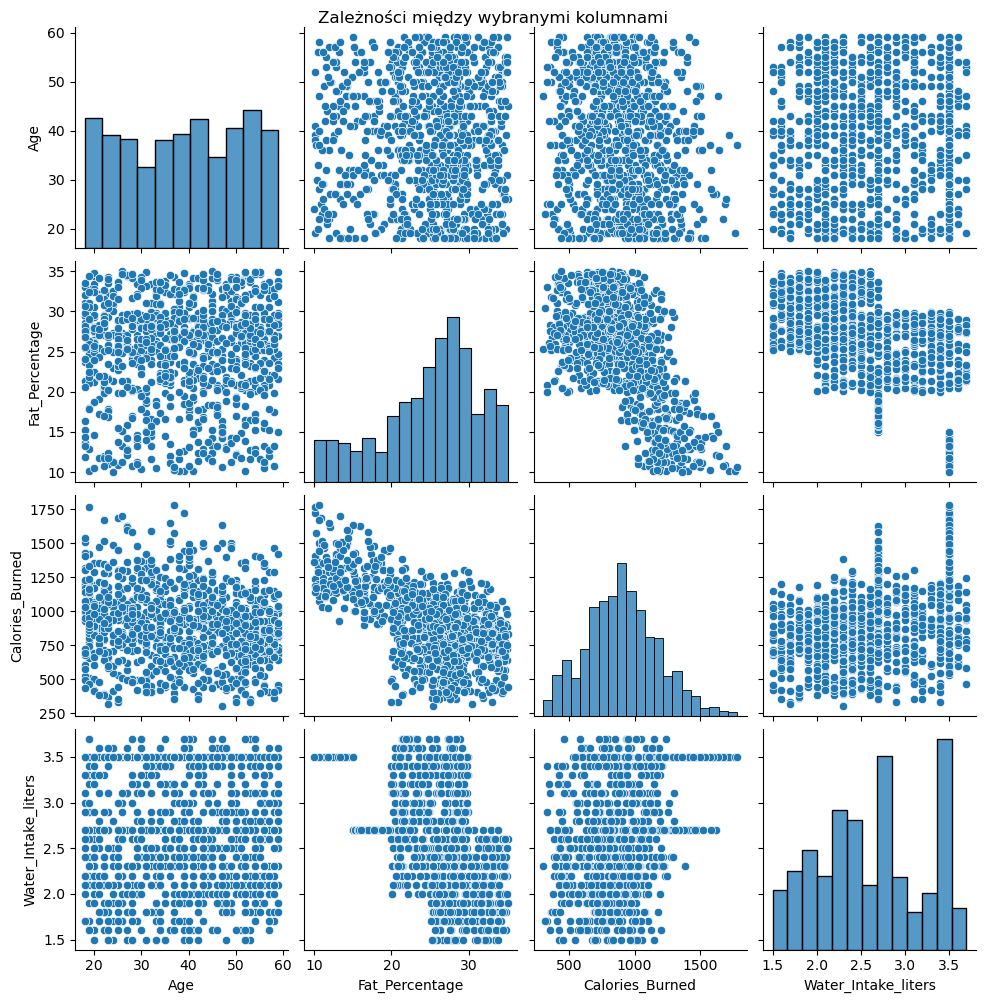

In [64]:
sns.pairplot(df_imputed, vars=['Age', 'Fat_Percentage', 'Calories_Burned', 'Water_Intake_liters'])
plt.suptitle("Zależności między wybranymi kolumnami", y=1)
plt.show()